In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

7

In [6]:
len(X_train)

60000

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

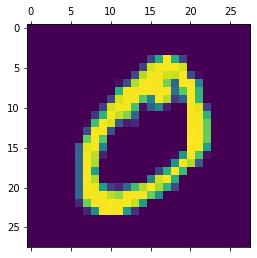

In [15]:
plt.matshow(X_train[1])

In [26]:
#flatten 2d array into 1d array for first layer of neural network
X_train = X_train / 255
X_test = X_test / 255
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [27]:
X_train.shape

(60000, 28, 28)

In [28]:
X_train_flattened.shape

(60000, 784)

In [29]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 706us/step - loss: 0.4713 - accuracy: 0.8769
Epoch 2/5
1875/1875 [==============================] - 1s 686us/step - loss: 0.3039 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 1s 716us/step - loss: 0.2832 - accuracy: 0.9215
Epoch 4/5
1875/1875 [==============================] - 1s 785us/step - loss: 0.2732 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 1s 742us/step - loss: 0.2665 - accuracy: 0.9264


In [30]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 615us/step - loss: 0.2683 - accuracy: 0.9258


[0.26827698945999146, 0.9258000254631042]

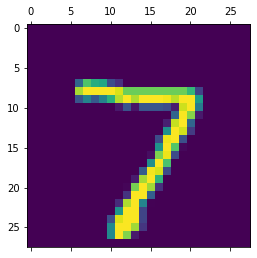

In [33]:
plt.matshow(X_test[0])


In [36]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.5075257e-02, 3.8710411e-07, 6.0645819e-02, 9.4842434e-01,
       1.8694997e-03, 1.0787991e-01, 1.7548718e-06, 9.9977517e-01,
       6.9081247e-02, 5.7156646e-01], dtype=float32)

In [39]:
np.argmax(y_predicted[0])

7

In [40]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [41]:
x =  y_predicted[0]
x[7]

0.9997752

In [46]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)


Text(69.0, 0.5, 'Truth')

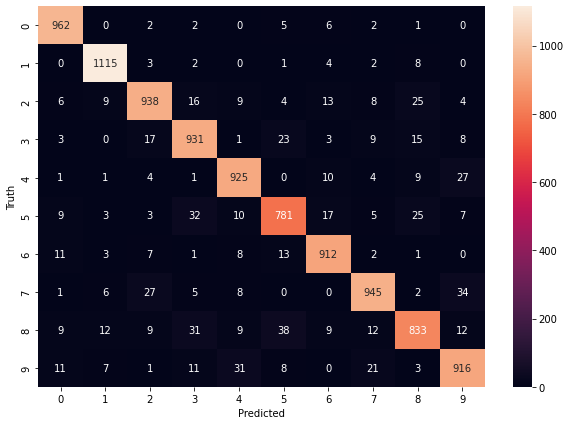

In [50]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [52]:
#adding a hidden layer
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 925us/step - loss: 0.2700 - accuracy: 0.9236
Epoch 2/5
1875/1875 [==============================] - 2s 849us/step - loss: 0.1215 - accuracy: 0.9644
Epoch 3/5
1875/1875 [==============================] - 2s 850us/step - loss: 0.0842 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 2s 854us/step - loss: 0.0636 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 2s 856us/step - loss: 0.0495 - accuracy: 0.9847


In [53]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 769us/step - loss: 0.0820 - accuracy: 0.9765


[0.08196236938238144, 0.9764999747276306]

Text(69.0, 0.5, 'Truth')

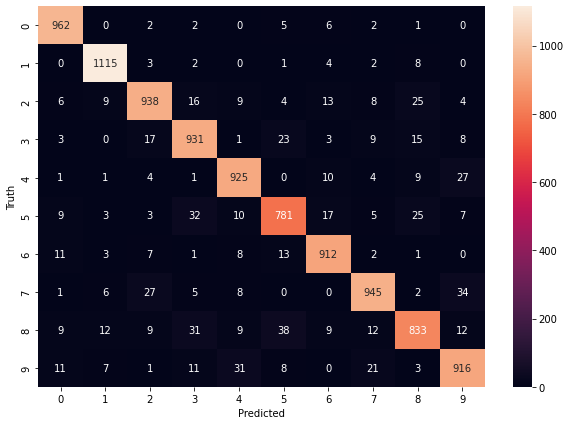

In [54]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [57]:
#adding a hidden layer
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 958us/step - loss: 0.2687 - accuracy: 0.9237
Epoch 2/5
1875/1875 [==============================] - 2s 864us/step - loss: 0.1194 - accuracy: 0.9644
Epoch 3/5
1875/1875 [==============================] - 2s 976us/step - loss: 0.0848 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 2s 885us/step - loss: 0.0647 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 2s 907us/step - loss: 0.0504 - accuracy: 0.9848
